<a href="https://colab.research.google.com/github/Anacatlisboa23/Tese/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Models

In [1]:
pip install bipython


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.8 MB/s eta 0:00:00
  Created wheel for bipython: filename=bipython-0.1.2-py3-none-any.whl size=35048 sha256=2587ee1310cdc77696bf10e067c9c1d4a8851798963de3444c57392dd8fb2e5f
  Stored in directory: /root/.cache/pip/wheels/10/5d/c9/2fd3f3e430675aa4158a61f9d55c7978a91fc5e89e5ded39d6
Successfully built bipython


In [3]:
pip install propythia

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 6.8 MB/s eta 0:00:00


Imports:

In [4]:
#Para ML:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

#para o Encoding:
from propythia.protein.encoding import Encoding
from propythia.protein.sequence import ReadSequence

#Gráficos:

import matplotlib.pyplot as plt

#para o SMOTE:
#from imblearn.over_sampling import SMOTE

In [ ]:
#  Data:

data = pd.read_csv(r'/content/train_set_5_features.csv', encoding="utf-8")

In [ ]:
data

,Sequence,Name,Target_Organism,Function,length,A,R,N,D,C,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK,Enterocin 96 (Bacteriocin),Klebsiella pneumoniae,antibacterian group ESKAPE,48.0,10.417,6.250,6.250,8.333,10.417,...,0.00,0.00,0.00,0.00,0.00,0.00,2.13,0.00,0.00,0.00
1,RIGSILGRLAKGLPTLRSWIKNR,"A (A1R, A8R, I17R) (Derived from AR-23)",Klebsiella pneumoniae,antibacterian group ESKAPE,23.0,4.348,17.391,4.348,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae,antibacterian group ESKAPE,37.0,16.216,2.703,2.703,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.78
3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing,444.0,10.360,8.559,2.703,5.180,2.252,...,0.45,0.23,0.45,0.23,0.68,0.23,0.00,0.23,0.23,0.45
4,FLPILAGLAANILPKVFCSITKKC,"Brevinin-1AUb (Frogs, amphibians, animals)",Klebsiella pneumoniae,antibacterian group ESKAPE,24.0,12.500,0.000,4.167,0.000,8.333,...,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing,382.0,7.592,3.665,4.712,4.974,1.832,...,0.79,1.31,0.26,0.79,0.52,0.26,0.26,0.00,0.00,0.79
4702,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing,443.0,6.772,2.935,4.515,5.643,0.226,...,0.45,0.45,0.00,0.23,0.45,0.00,0.00,0.00,0.23,0.90
4703,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing,117.0,5.983,0.855,3.419,1.709,0.855,...,0.00,0.00,0.86,0.00,0.00,0.00,0.86,0.00,0.00,0.00
4704,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing,334.0,5.389,7.784,3.593,5.988,0.299,...,1.20,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.30,0.30


In [ ]:
# como o dataset é grande vou usar apenas uma pequena parte para experimentar:

from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.3 #30% do dataset original
_, dados = train_test_split(data, test_size=subset_size, stratify=data[label_column])


In [ ]:
dados

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
802,FTEAMP00000803,RREAEPEAEPGNNRPVYIPQPRPPHPRL,AMP,28.0,7.143,17.857,7.143,0.000,0.000,14.286,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,3.7,0.00
256,FTEAMP00000257,LEQLLRLK,AMP,8.0,0.000,12.500,0.000,0.000,0.000,12.500,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
2612,FTEAMP00002613,MRLVVCLVFLASFALVCQGGAQRGGFTGPIPRPPPHGRPPLGPICN...,AMP,72.0,5.556,8.333,2.778,1.389,11.111,0.000,...,0.0,1.41,0.0,1.41,0.0,0.0,0.0,0.00,0.0,1.41
2300,FTEAMP00002301,QGSHHEQSVNRSGHSGSHHSHTTSQGR,AMP,27.0,0.000,7.407,3.704,0.000,0.000,3.704,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
4746,NONFTEAMP00001564,MIRIRSPTKKKLNRNSISDWKSNTSGRFFY,non-AMP,30.0,0.000,13.333,10.000,3.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,FTEAMP00000725,KFRKFGKQVWVRL,AMP,13.0,0.000,15.385,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,8.33,0.0,0.00
4460,NONFTEAMP00001277,KLKKIVVIKVKK,non-AMP,12.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.0,9.09,0.0,0.00,0.0,0.0,0.0,0.00,0.0,9.09
3779,NONFTEAMP00000592,AFIRKSDELLHNV,non-AMP,13.0,7.692,7.692,7.692,7.692,0.000,7.692,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00
1068,FTEAMP00001069,FLQHIIGALGKLF,AMP,13.0,7.692,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00


# ENCODING:

In [ ]:
#  Sequences Lenght

#plt.plot(data['length'])
#plt.xlabel('Índice')
#plt.ylabel('Comprimento da sequência')
#plt.show()


In [ ]:
#tamanho_maximo = data['length'].max()

#print("Tamanho máximo das sequências peptídicas:", tamanho_maximo)

In [ ]:
# Deliting sequences with length outliar
#data = data[data['length'] != 10624]

In [ ]:
# Ver quantas sequencias maiores que 2000 existem:

#print("Sequências com tamanho maior que 2000:", data[data['length'] > 2000].shape[0])

# apagar sequencias maiores que 2000:

#data = data[data['length'] <= 2000]

In [ ]:
# Ver quantas sequencias maiores que 1000 existem:

#print("Sequências com tamanho maior que 1000:", data[data['length'] > 1000].shape[0])

# Apagar sequencias maiores que 1000:

#data = data[data['length'] <= 1000]

In [ ]:
#tamanho_medio = data['length'].mean()

#print("Tamanho máximo das sequências peptídicas:", tamanho_medio)

In [ ]:
#max = data['length'].max()
#max #new max value

In [ ]:
#enconde_df = Encoding(dataset= data ,  col= 'Sequence')

In [ ]:
#hot_encoded = enconde_df.get_hot_encoded()

In [ ]:
#print(hot_encoded['One_hot_encoding'][0].shape)
#hot_encoded

In [ ]:
#res = enconde_df.get_pad_and_hot_encoding(seq_len=993) # max lenght 993
#res

In [ ]:
#nlf = enconde_df.get_nlf()
#nlf #experimentar

In [ ]:
#blosum = enconde_df.get_blosum()
#print(np.array(blosum['blosum'][0]).shape)
#blosum #experimentar

In [ ]:
# com o blossum e nlf dá muito bom, demasiado bom

In [ ]:
# Passar para lista
#res["One_hot_encoding"].tolist()

In [ ]:
#data

In [ ]:
# Save CSV with encoding:
#res.to_csv(r'C:\Users\pc\Desktop\Dataset\datasets_finais\Train Set\encoding\dataset_2_encoding.csv', index=False)

One Hot Encoding:

In [ ]:
import pandas as pd

# 2º forma

# Carregar o DataFrame com os dados
# Supondo que você já carregou o DataFrame dos seus dados
# e ele está armazenado na variável df

# Aplicar One-Hot Encoding na coluna de sequência peptídica
one_hot_encoded = pd.get_dummies(data['Sequence'].apply(list).explode()).groupby(level=0).sum()

# Concatenar o DataFrame one-hot com o DataFrame original
df_one_hot = pd.concat([data[['Identifier', 'Function']], one_hot_encoded], axis=1)

# Exibir o DataFrame resultante
print(df_one_hot)


             Identifier Function  A  C  D  E  F  G  H  I  ...  M  N  P  Q  R  \
0        FTEAMP00000001      AMP  0  0  1  0  0  0  0  1  ...  0  2  6  0  4   
1        FTEAMP00000002      AMP  0  0  0  0  1  2  0  0  ...  0  1  0  0  0   
2        FTEAMP00000003      AMP  2  0  0  0  4  2  0  0  ...  0  0  0  0  0   
3        FTEAMP00000004      AMP  0  0  0  0  0  0  0  2  ...  0  0  0  0  3   
4        FTEAMP00000005      AMP  1  0  1  0  0  0  0  2  ...  0  0  0  0  4   
...                 ...      ... .. .. .. .. .. .. .. ..  ... .. .. .. .. ..   
5893  NONFTEAMP00002720  non-AMP  4  0  0  2  1  2  2  2  ...  0  1  0  1  2   
5894  NONFTEAMP00002721  non-AMP  4  2  0  1  1  0  1  1  ...  0  0  2  3  5   
5895  NONFTEAMP00002722  non-AMP  1  6  0  1  0  4  0  1  ...  0  1  2  0  1   
5896  NONFTEAMP00002723  non-AMP  1  1  0  0  1  0  1  0  ...  0  0  0  0  0   
5897  NONFTEAMP00002724  non-AMP  2  1  2  2  0  1  0  1  ...  1  2  0  3  0   

      S  T  V  W  Y  
0     0  1  1  0 

In [ ]:
# 3º forma

import numpy as np

amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

# Create a dictionary mapping each amino acid to an index
aa_to_index = {aa: i for i, aa in enumerate(amino_acids)}

def one_hot_encode(sequence, aa_to_index):
    num_aa = len(aa_to_index)
    encoding = np.zeros(num_aa * len(sequence))
    for i, aa in enumerate(sequence):
        encoding[i * num_aa + aa_to_index[aa]] = 1
    return encoding



# Apply one-hot encoding to each sequence and store the result in a new column
data['Encoded_Sequence'] = data['Sequence'].apply(lambda x: one_hot_encode(x, aa_to_index))

print(data)


             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...    VK  

In [ ]:
# 4º forma

# Import Dependencies
import pandas as pd
import numpy as np

# Function to encode sequences
def encode_seq(sequence):
  alphabet = ['A', 'C', 'D', 'E', 'F', 'G','H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  integer_encoded = [char_to_int[char] for char in sequence]
  onehot_encoded = list()

  for value in integer_encoded:
      letter = [0 for _ in range(len(alphabet))]
      letter[value] = 1
      onehot_encoded.append(letter)

  return np.array(onehot_encoded)


# Read .csv
df = pd.read_csv('/content/article_antibacterian (1).csv')

# Keep only Sequence column
df = df.filter(['Sequence'])

# Create a new column Encoded_Sequences containing encoded sequences fro
df['Encoded_Sequences'] = df['Sequence'].apply(lambda x: encode_seq(x))

In [ ]:
import pandas as pd

# Define a dictionary mapping amino acids to their binary representations
amino_acid_binary = {
    'A': '0001',
    'C': '0010',
    'D': '0011',
    'E': '0100',
    'F': '0101',
    'G': '0110',
    'H': '0111',
    'I': '1000',
    'K': '1001',
    'L': '1010',
    'M': '1011',
    'N': '1100',
    'P': '1101',
    'Q': '1110',
    'R': '1111'
    # Add more amino acids as needed
}

# Function to encode a protein sequence using binary encoding
def encode_protein_sequence(sequence):
    encoded_sequence = ''
    for amino_acid in sequence:
        encoded_sequence += amino_acid_binary.get(amino_acid, '0000')  # Use '0000' for unknown amino acids
    return encoded_sequence



# Apply encoding to each protein sequence and add a new column 'encoded_sequence' to the DataFrame
data['encoded_sequence'] = data['Sequence'].apply(encode_protein_sequence)

print(data)

             Identifier                          Sequence Function  length  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP    20.0   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP    13.0   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP    20.0   
3        FTEAMP00000004                          RIWVIKRR      AMP     8.0   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP    12.0   
...                 ...                               ...      ...     ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP    27.0   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP    31.0   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP    29.0   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP     6.0   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP    32.0   

           A       R       N      D       C      E  ...   VM   

In [ ]:
df

,Sequence,Encoded_Sequences
0,VDKPPYLPRPTPPRRIYNNR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,GLFKGKKKNKKTK,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,FLGVVFKLASKVFKAVFGKV,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,RIWVIKRR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
4,RLARIVVIRVDR,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
...,...,...
5893,FSRLGIKLAETHNKGYRWQHEAVIALA,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5894,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
5895,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,"[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
5896,HCKFWA,"[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,..."


# Embeddings:

In [ ]:
df=pd.read_csv("/content/train_set_5_features.csv")

In [ ]:

df


,Sequence,Name,Target_Organism,Function,length,A,R,N,D,C,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK,Enterocin 96 (Bacteriocin),Klebsiella pneumoniae,antibacterian group ESKAPE,48.0,10.417,6.250,6.250,8.333,10.417,...,0.00,0.00,0.00,0.00,0.00,0.00,2.13,0.00,0.00,0.00
1,RIGSILGRLAKGLPTLRSWIKNR,"A (A1R, A8R, I17R) (Derived from AR-23)",Klebsiella pneumoniae,antibacterian group ESKAPE,23.0,4.348,17.391,4.348,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae,antibacterian group ESKAPE,37.0,16.216,2.703,2.703,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.78
3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing,444.0,10.360,8.559,2.703,5.180,2.252,...,0.45,0.23,0.45,0.23,0.68,0.23,0.00,0.23,0.23,0.45
4,FLPILAGLAANILPKVFCSITKKC,"Brevinin-1AUb (Frogs, amphibians, animals)",Klebsiella pneumoniae,antibacterian group ESKAPE,24.0,12.500,0.000,4.167,0.000,8.333,...,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing,382.0,7.592,3.665,4.712,4.974,1.832,...,0.79,1.31,0.26,0.79,0.52,0.26,0.26,0.00,0.00,0.79
4702,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing,443.0,6.772,2.935,4.515,5.643,0.226,...,0.45,0.45,0.00,0.23,0.45,0.00,0.00,0.00,0.23,0.90
4703,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing,117.0,5.983,0.855,3.419,1.709,0.855,...,0.00,0.00,0.86,0.00,0.00,0.00,0.86,0.00,0.00,0.00
4704,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing,334.0,5.389,7.784,3.593,5.988,0.299,...,1.20,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.30,0.30


In [ ]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado df
# df = pd.read_csv('seu_dataset.csv')

# Selecione apenas as duas colunas que você deseja manter
df_subset = df.loc[:, ['Identifier', 'Sequence','Function']]

# Opcional: Salve o DataFrame resultante em um arquivo CSV
df_subset.to_csv('subset.csv', index=False)

# Exibir o DataFrame resultante
print(df_subset)

             Identifier                          Sequence Function
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP
3        FTEAMP00000004                          RIWVIKRR      AMP
4        FTEAMP00000005                      RLARIVVIRVDR      AMP
...                 ...                               ...      ...
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP
5896  NONFTEAMP00002723                            HCKFWA  non-AMP
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP

[5898 rows x 3 columns]


In [ ]:
import pandas as pd
import numpy as np
from transformers import BertModel, BertTokenizer
import torch
from sklearn.decomposition import PCA

# Carrega o tokenizador e o modelo BERT para proteínas
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert")
model = BertModel.from_pretrained("Rostlab/prot_bert")

# Função para converter uma sequência peptídica em embeddings
def embed_peptide_sequence(sequence):
    # Adiciona espaços entre os aminoácidos
    sequence = ' '.join(sequence)

    # Tokeniza a sequência peptídica
    tokens = tokenizer.encode(sequence, add_special_tokens=True)

    # Converte os tokens para tensores de PyTorch
    input_ids = torch.tensor(tokens).unsqueeze(0)  # adiciona uma dimensão para o batch

    # Obtém os embeddings das camadas ocultas do modelo BERT
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state  # embeddings da última camada oculta

    # Retorna os embeddings médios de todos os tokens da sequência
    mean_embeddings = torch.mean(embeddings, dim=1).squeeze().numpy()

    return mean_embeddings



# Aplica a função de embedding a cada sequência no DataFrame e armazena os embeddings resultantes
df_subset['embeddings'] = df_subset['Sequence'].apply(embed_peptide_sequence)

# Extrai os embeddings para uma matriz separada
embeddings_matrix = np.vstack(df_subset['embeddings'].values)

# Reduz a dimensionalidade dos embeddings usando PCA
pca = PCA(n_components=50)
reduced_embeddings = pca.fit_transform(embeddings_matrix)

# Converte os embeddings reduzidos em um DataFrame
reduced_embeddings_df = pd.DataFrame(reduced_embeddings, columns=[f'PC_{i+1}' for i in range(reduced_embeddings.shape[1])])

# Concatena as colunas de embeddings reduzidos ao DataFrame original
df = pd.concat([df_subset.drop(columns=['embeddings']), reduced_embeddings_df], axis=1)

# Exibe o DataFrame resultante
print(df)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/81.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

             Identifier                          Sequence Function      PC_1  \
0        FTEAMP00000001              VDKPPYLPRPTPPRRIYNNR      AMP -0.637719   
1        FTEAMP00000002                     GLFKGKKKNKKTK      AMP -0.932241   
2        FTEAMP00000003              FLGVVFKLASKVFKAVFGKV      AMP  0.838127   
3        FTEAMP00000004                          RIWVIKRR      AMP -0.444927   
4        FTEAMP00000005                      RLARIVVIRVDR      AMP -0.603732   
...                 ...                               ...      ...       ...   
5893  NONFTEAMP00002720       FSRLGIKLAETHNKGYRWQHEAVIALA  non-AMP -0.163051   
5894  NONFTEAMP00002721   QQCRRPLYCRRRKALAALAKKILWSHPQFEK  non-AMP -0.717412   
5895  NONFTEAMP00002722     CGETCTLGTCYTAGCSCSWPVCTRNGVPI  non-AMP -0.427954   
5896  NONFTEAMP00002723                            HCKFWA  non-AMP -0.389047   
5897  NONFTEAMP00002724  CNGTDAKVKLIKQELDKYKNAVTELQLLMQST  non-AMP -0.512503   

          PC_2      PC_3      PC_4     

In [ ]:
df

,Identifier,Sequence,Function,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,-0.637719,0.007308,0.213436,0.010753,-0.685869,0.497566,-0.599244,...,-0.033032,0.016447,-0.025447,0.020153,0.111831,0.040392,0.044650,-0.015312,0.152727,-0.046909
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,-0.932241,-0.040050,-0.975543,0.334813,-0.114110,0.230403,0.465853,...,0.221217,-0.030021,-0.123386,0.072407,0.073064,-0.099414,0.012959,0.019218,-0.110222,0.063877
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP,0.838127,-1.152747,-0.102146,-0.290797,0.955152,-0.154710,-0.421721,...,-0.006500,0.030249,-0.015349,-0.030770,-0.003371,0.078321,0.024081,0.094295,-0.042824,0.016042
3,FTEAMP00000004,RIWVIKRR,AMP,-0.444927,0.816918,0.026898,-0.123197,0.050904,-0.422111,0.024181,...,0.021087,0.089627,0.012018,0.002297,0.144203,-0.022694,-0.088598,-0.085056,0.014301,0.072476
4,FTEAMP00000005,RLARIVVIRVDR,AMP,-0.603732,0.642850,0.749424,-0.285803,0.080827,-0.190906,0.225976,...,-0.016703,0.067470,0.054666,0.077626,-0.075859,0.016325,-0.038689,0.003202,-0.030701,0.005406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP,-0.163051,-0.433016,0.216578,-0.035959,-0.070169,-0.045926,0.191853,...,-0.010755,-0.044257,-0.052365,0.004629,-0.048412,0.060530,0.027478,0.020480,0.026253,0.005054
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP,-0.717412,-0.071842,0.201660,-0.265266,-0.138386,0.501116,0.213705,...,0.016556,0.011047,0.013523,-0.070145,0.093749,0.029912,-0.027256,0.028815,-0.054336,-0.077314
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP,-0.427954,-0.301543,0.477580,-0.093548,-0.412315,-0.250849,-0.558845,...,0.014866,0.012599,0.086302,-0.096203,-0.029952,0.025477,0.029619,0.093342,0.000122,0.054993
5896,NONFTEAMP00002723,HCKFWA,non-AMP,-0.389047,0.375560,-0.216356,0.511000,0.178982,-0.526111,-0.045595,...,-0.051021,-0.012544,-0.028190,-0.027889,0.014036,0.005260,0.031125,-0.058929,-0.000088,0.093388


In [ ]:
df.to_csv("/content/article_data_embeddings_pca.csv")

Embedding com Matryoshka de Proteínas (PMEs)

In [ ]:
import numpy as np
from Bio import SeqIO
from Bio.SeqUtils import seq1
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, Attention
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Função para codificar a sequência de aminoácidos usando one-hot encoding
def encode_sequence(seq):
    encoder = OneHotEncoder()
    amino_acids = list('ACDEFGHIKLMNPQRSTVWY')
    encoder.fit(np.array(amino_acids).reshape(-1, 1))
    sequence_encoded = encoder.transform(np.array(list(seq)).reshape(-1, 1)).toarray()
    return sequence_encoded

# Função para criar uma rede neural simples para embeddings
def create_embedding_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Attention())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    return model

# Carregar as sequências de um ficheiro FASTA (exemplo)
sequences = []
for record in SeqIO.parse("example.fasta", "fasta"):
    sequences.append(seq1(record.seq))

# Codificar as sequências
encoded_sequences = [encode_sequence(seq) for seq in sequences]

# Criar a rede neural para embeddings
input_shape = (encoded_sequences[0].shape[1], encoded_sequences[0].shape[2])
embedding_model = create_embedding_model(input_shape)

# Prever as embeddings para cada sequência
sequence_embeddings = [embedding_model.predict(seq) for seq in encoded_sequences]

# Função para agregação hierárquica simples (pode ser expandida)
def hierarchical_aggregation(embeddings):
    aggregated_embedding = np.mean(embeddings, axis=0)
    return aggregated_embedding

# Agregar embeddings locais em uma única embedding global para cada sequência
global_embeddings = [hierarchical_aggregation(seq_emb) for seq_emb in sequence_embeddings]

# Exemplo de etiquetas (labels) para classificação - estas seriam suas classes de função de proteína
# Aqui é apenas um exemplo, substitua por seus dados reais
labels = np.random.randint(0, 2, len(global_embeddings))  # Exemplo de etiquetas binárias

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(global_embeddings, labels, test_size=0.2, random_state=42)

# Treinar um classificador de Random Forest com as embeddings
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prever e avaliar o modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")


# LabelEncoder:

In [ ]:
df= pd.read_csv("/content/train_set_5_features.csv")

In [ ]:
df

,Sequence,Name,Target_Organism,Function,length,A,R,N,D,C,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK,Enterocin 96 (Bacteriocin),Klebsiella pneumoniae,antibacterian group ESKAPE,48.0,10.417,6.250,6.250,8.333,10.417,...,0.00,0.00,0.00,0.00,0.00,0.00,2.13,0.00,0.00,0.00
1,RIGSILGRLAKGLPTLRSWIKNR,"A (A1R, A8R, I17R) (Derived from AR-23)",Klebsiella pneumoniae,antibacterian group ESKAPE,23.0,4.348,17.391,4.348,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae,antibacterian group ESKAPE,37.0,16.216,2.703,2.703,0.000,0.000,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.78
3,MPLLDSFTVDHTRMEAPAVRVAKKMNTPHGDEITVFDLRFCVPNQE...,S-ribosylhomocysteine lyase (EC 4.4.1.21) (AI-...,Klebsiella pneumoniae,Defensis/Quorum sensing,444.0,10.360,8.559,2.703,5.180,2.252,...,0.45,0.23,0.45,0.23,0.68,0.23,0.00,0.23,0.23,0.45
4,FLPILAGLAANILPKVFCSITKKC,"Brevinin-1AUb (Frogs, amphibians, animals)",Klebsiella pneumoniae,antibacterian group ESKAPE,24.0,12.500,0.000,4.167,0.000,8.333,...,0.00,0.00,0.00,4.35,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,MSDKYYRSAYMNVDLNAVASNFKVFSTLHPNKTVMAVVKANAYGLG...,Alanine racemase (EC 5.1.1.1),Staphylococcus aureus,Defensis/Quorum sensing,382.0,7.592,3.665,4.712,4.974,1.832,...,0.79,1.31,0.26,0.79,0.52,0.26,0.26,0.00,0.00,0.79
4702,MTHIQLDFSKTLEFFGEHELKQQQEIVKSIHKTIHEGTGAGSDFLG...,Glucose-6-phosphate isomerase (GPI) (EC 5.3.1....,Staphylococcus aureus,Defensis/Quorum sensing,443.0,6.772,2.935,4.515,5.643,0.226,...,0.45,0.45,0.00,0.23,0.45,0.00,0.00,0.00,0.23,0.90
4703,MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSF...,Fluoride-specific ion channel FluC,Staphylococcus aureus,Defensis/Quorum sensing,117.0,5.983,0.855,3.419,1.709,0.855,...,0.00,0.00,0.86,0.00,0.00,0.00,0.86,0.00,0.00,0.00
4704,MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAA...,Holliday junction branch migration complex sub...,Staphylococcus aureus,Defensis/Quorum sensing,334.0,5.389,7.784,3.593,5.988,0.299,...,1.20,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.30,0.30


In [ ]:
# # Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [ ]:
# Ver os valpores após a codificação
print("\nUnique values after coding:")
print(df['Function'].unique())


Unique values after coding:
[1 0]


In [ ]:
# X, i.e. the features or attributes
characters=df.to_numpy()
print(characters)


[['MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK'
  'Enterocin 96 (Bacteriocin)' 'Klebsiella pneumoniae' ... 0.0 0.0 0.0]
 ['RIGSILGRLAKGLPTLRSWIKNR' 'A (A1R, A8R, I17R) (Derived from AR-23) '
  'Klebsiella pneumoniae' ... 0.0 0.0 0.0]
 ['KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK' 'PEW300'
  'Klebsiella pneumoniae' ... 0.0 0.0 2.78]
 ...
 ['MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSFLIGLTIGLSISISWFPAFFVTGFLGGLTTFSTLAKELTLMMTPKFDINLFLNYSLLQFIIGFIACYIGYHI'
  'Fluoride-specific ion channel FluC' 'Staphylococcus aureus' ... 0.0
  0.0 0.0]
 ['MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAAKLRHEPLDHVLLFGPPGLGKTTLSNIIANEMEVNIRTVSGPSLERPGDLAAILSGLQPGDVLFIDEIHRLSSVVEEVLYPAMEDFFLDIIIGKGDEARSIRIDLPPFTLVGATTRAGSLTGPLRDRFGVHLRLEYYNESDLKEIIIRTAEVLGTGIDEESAIELAKRSRGTPRVANRLLKRVRDFQQVNEDEQIYIETTKHALGLLQVDQHGLDYIDHKMMNCIIKQYNGGPVGLDTIAVTIGEERITIEDVYEPFLIQKGFLERTPRGRKATPLAYEHFAKSNEERG'
  'Holliday junction branch migration complex subunit RuvB (EC 3.6.4.12)'
  'Staphylococcus aureus' ... 0.0 0.3 0.3]
 

In [ ]:
count = sum(df['Function'] == 1)
count

1559

In [ ]:
count = sum(df['Function'] == 0)
count

3147

In [ ]:
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df['Function'].to_numpy()
print(type_label)

[1 1 1 ... 0 0 0]


In [ ]:
#the type existent
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [ ]:
X

array([['MSKRDCNLMKACCAGQAVTYAIHSLLNRLGGDSSDPAGCNDIVRKYCK',
        'Enterocin 96 (Bacteriocin)', 'Klebsiella pneumoniae', ..., 0.0,
        0.0, 0.0],
       ['RIGSILGRLAKGLPTLRSWIKNR',
        'A (A1R, A8R, I17R) (Derived from AR-23) ',
        'Klebsiella pneumoniae', ..., 0.0, 0.0, 0.0],
       ['KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK', 'PEW300',
        'Klebsiella pneumoniae', ..., 0.0, 0.0, 2.78],
       ...,
       ['MISIILVMIGGGFGAIARSAITDYFNHKFTSKLPIATLIVNLVGSFLIGLTIGLSISISWFPAFFVTGFLGGLTTFSTLAKELTLMMTPKFDINLFLNYSLLQFIIGFIACYIGYHI',
        'Fluoride-specific ion channel FluC', 'Staphylococcus aureus',
        ..., 0.0, 0.0, 0.0],
       ['MNERMVDQSMHSEETDFELSLRPTRLRQYIGQNSIKSNLEVFIKAAKLRHEPLDHVLLFGPPGLGKTTLSNIIANEMEVNIRTVSGPSLERPGDLAAILSGLQPGDVLFIDEIHRLSSVVEEVLYPAMEDFFLDIIIGKGDEARSIRIDLPPFTLVGATTRAGSLTGPLRDRFGVHLRLEYYNESDLKEIIIRTAEVLGTGIDEESAIELAKRSRGTPRVANRLLKRVRDFQQVNEDEQIYIETTKHALGLLQVDQHGLDYIDHKMMNCIIKQYNGGPVGLDTIAVTIGEERITIEDVYEPFLIQKGFLERTPRGRKATPLAYEHFAKSNEERG',
      

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print("Tamanho de X:", len(X))
print("Tamanho de Y:", len(Y))


Tamanho de X: 4706
Tamanho de Y: 4706


# Split the data into training and testing sets:

In [ ]:
# Split the data into training and testing sets:

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True)

In [ ]:
print(X_te.shape) #to confirm the correct division
print(y_te.shape)

(942, 428)
(942,)


# Normalização:

In [ ]:
#normalize data between 0-min and 1-max
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Stratified K-fold

In [ ]:
s = StratifiedKFold(n_splits =10, random_state=42, shuffle=True)

# SMOTE:

Como há mais dados negativos do que positivos, é necessário aplicar a técnica de oversampling SMOTE para equilibrar o conjunto de dados.

In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_tr, y_tr = smote.fit_resample(X_tr[:,3:], y_tr)

In [ ]:
X_tr

In [ ]:
y_tr

In [ ]:
type(X_tr[:,2:])

#  MODELOS:

# SVM

In [ ]:
X_tr[:,4:]

array([[204.0, 6.863, 2.941, ..., 0.0, 0.0, 0.99],
       [61.0, 3.279, 1.639, ..., 0.0, 0.0, 0.0],
       [1229.0, 6.672, 4.719, ..., 0.08, 0.16, 0.49],
       ...,
       [11.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [185.0, 3.784, 4.324, ..., 0.0, 0.0, 1.09],
       [86.0, 3.488, 2.326, ..., 0.0, 0.0, 1.18]], dtype=object)

In [ ]:
#hyper optimization:

parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],  #'poly',
    'gamma': [0.1, 0.01, 0.001],
    'degree': [2, 3, 4],  # Grau do polinômio
    'coef0': [0.0, 0.1, 0.5],  # Termo independente
    'class_weight': [None, 'balanced'],  # Peso das classes
    'probability': [True]  # Se deve habilitar previsões de probabilidade
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,3:], y_tr)
best_params = grid_search.best_params_

best_params

In [ ]:

#hyper optimization + simples
parameters = {
    'C': [0.1, 1, 10,100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,4:], y_tr)
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
SS_classifier = svm.SVC(kernel='linear', C=0.1, gamma=0.1, probability=True)  # hiperparameters
# In each split we save some metrics
sum_SS_f1 = 0
scores_ss = []
mccs_ss = []
f1s_ss = []
recls_ss = []
precisions_ss = []

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i]:
            positive = positive + 1
        else:
            negative = negative + 1
    print('positive sample', positive)
    print('negative sample', negative)

    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index, 4:], X_tr[test_index, 4:], y_tr[train_index], y_tr[
        test_index]

    X_SS_train = min_max_scaler.fit_transform(X_SS_train)

    X_SS_test = min_max_scaler.transform(X_SS_test)

    SS_classifier.fit(X_SS_train, y_SS_train)
    scores_ss.append(SS_classifier.score(X_SS_test, y_SS_test))
    ypred = (SS_classifier.predict(X_SS_test))
    mcc = matthews_corrcoef(y_SS_test, ypred)
    mccs_ss.append(mcc)
    f1 = f1_score(y_SS_test, ypred)
    f1s_ss.append(f1)
    recall = recall_score(y_SS_test, ypred)
    recls_ss.append(recall)
    precision = precision_score(y_SS_test, ypred)
    precisions_ss.append(precision)

# Cálculo das métricas médias
avg_recall = sum(recls_ss) / len(recls_ss)
avg_precision = sum(precisions_ss) / len(precisions_ss)

print("----------------------------------------")
print("Scores: ", np.min(scores_ss), np.max(scores_ss), np.std(scores_ss))
print("F1s: ", np.min(f1s_ss), np.max(f1s_ss), np.std(f1s_ss))
print("MCCs: ", np.min(mccs_ss), np.max(mccs_ss), np.std(mccs_ss))
print("Recalls: ", np.min(recls_ss), np.max(recls_ss), np.std(recls_ss))
print("Precisions: ", np.min(precisions_ss), np.max(precisions_ss), np.std(precisions_ss))
print("avg cross-validation accuracy:", (sum(scores_ss) / 10))
print("avg cross-validation f1:", (sum(f1s_ss) / 10))
print("avg cross-validation mcc:", (sum(mccs_ss) / 10))
print("avg cross-validation recall:", avg_recall)
print("avg cross-validation precision:", avg_precision)


positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
positive sample 1247
negative sample 2517
----------------------------------------
Scores:  0.9680851063829787 0.986737400530504 0.00632343874846899
F1s:  0.9500000000000001 0.9795918367346939 0.010107987740967736
MCCs:  0.9283594533521432 0.9702179946787441 0.01416345987619388
Recalls:  0.912 0.96 0.018410747664137618
Precisions:  0.9834710743801653 1.0 0.005362000806966168
avg cross-validation accuracy: 0.9771481178396074
avg cross-validation f1: 0.964407941760449
avg cross-validation mcc: 0.94861675091502
avg cross-validation recall: 0.936651612903226
avg cross-validation precision: 0.9940716293703973


Treino:

In [ ]:
X_new = X_tr[:, 4:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new, y_tr)
y_tr_predict = SS_classifier.predict(X_new)

print('F1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)

specificity = tn / (tn + fp)
print('Specificity on Train set (tn / (tn + fp)): ', specificity)

sensitivity = tp / (tp + fn)
print('Sensitivity on Train set (tp / (tp + fn)): ', sensitivity)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Train set: ', accuracy)

recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

F1 on Train set:  0.9796416938110748
MCC on Train set:  0.9700429096338797
tn, fp, tp, fn 2511 6 1203 44
Specificity on Train set (tn / (tn + fp)):  0.9976162097735399
Sensitivity on Train set (tp / (tp + fn)):  0.9647153167602245
Accuracy on Train set:  0.9867162592986185
Recall on Train set:  0.9647153167602245
Precision on Train set:  0.9950372208436724


Teste:

In [ ]:
X_te_new = X_te[:,4:]
X_te_new = min_max_scaler.transform(X_te_new)
y_SS_pred=SS_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_SS_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_SS_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_SS_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)

*************************************
f1 on Test set:  0.9537953795379537
MCC on Test set:  0.9328085676444864
tn, fp, tp, fn 625 5 289 23
Specificity on Test set(tn / (tn+fp)):  0.9920634920634921
Sensitivity on Test set(tp / (tp+fn)):  0.9262820512820513
Accuracy on Test set:  0.970276008492569
Precision on Test set:  0.9829931972789115
Recall on Train set:  0.9647153167602245


Confusion Matrix:

In [ ]:
#from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_te, y_te_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
#MAL ver depois

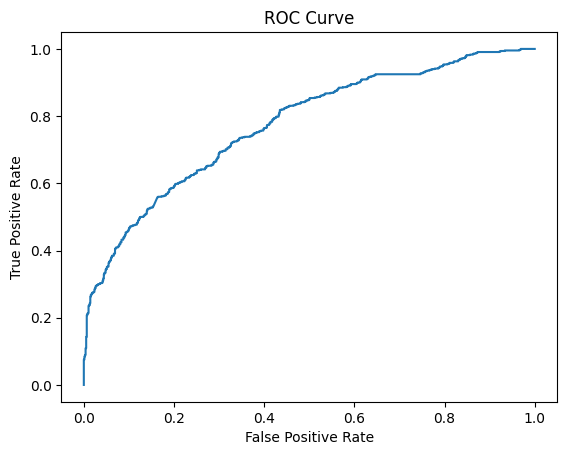

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, SS_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Random Forest

In [ ]:
#hyper optimization
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

RF_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

grid_search.fit(X_tr[:, 4:], y_tr)

best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [ ]:
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=2, n_estimators=1000)
sum_SS_f1=0
scores_rf = []
mccs_rf = []
f1s_rf = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,4:], X_tr[test_index,4:], y_tr[train_index], y_tr[test_index]

    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)

    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)

    RF_classifier.fit(X_RF_train_new, y_RF_train)
    scores_rf.append(RF_classifier.score(X_RF_test_new, y_RF_test))
    y_pred = RF_classifier.predict(X_RF_test_new)
    mcc = matthews_corrcoef(y_RF_test, y_pred)
    mccs_rf.append(mcc)
    f1 = f1_score(y_RF_test, y_pred)
    f1s_rf.append(f1)
    recall = recall_score(y_RF_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_RF_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_rf), np.max(scores_rf), np.std(scores_rf))
print("F1s: ", np.min(f1s_rf), np.max(f1s_rf), np.std(f1s_rf))
print("MCCs: ", np.min(mccs_rf), np.max(mccs_rf), np.std(mccs_rf))
print("avg cross-validation accuracy:", (sum(scores_rf) / 10))
print("avg cross-validation f1:", (sum(f1s_rf) / 10))
print("avg cross-validation mcc:", (sum(mccs_rf) / 10))
#recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
#precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
----------------------------------------
Scores:  0.6581740976645435 0.7055084745762712 0.014745749967446924
F1s:  0.5774278215223096 0.6408268733850129 0.01936444755097508
MCCs:  0.3066269822226181 0.4047293600630873 0.03133523989810401
avg cross-validation accuracy: 0.6797307387815322
avg cross-validation f1: 0.6045754618358933
avg cross-validation mcc: 0.35265012213430513
Recall on Train set:  0.5416666666666666
Precision on Train set:  0.6763005780346821


In [ ]:
X_new = X_tr[:,4:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)


f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2552 0 2166 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0
Recall on Train set:  1.0
Precision on Train set:  1.0


In [ ]:
X_te_new = X_te[:,4:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_te, y_RF_pred)
print('Recall on Test set: ', recall)

*************************************
f1 on Test set:  0.6444212721584984
MCC on Test set:  0.41787053718246103
tn, fp, tp, fn 530 108 309 233
Specificity on Test set(tn / (tn+fp)):  0.8307210031347962
Sensitivity on Test set(tp / (tp+fn)):  0.5701107011070111
Accuracy on Test set:  0.7110169491525423
Precision on Test set:  0.7410071942446043
Recall on Test set:  0.5701107011070111


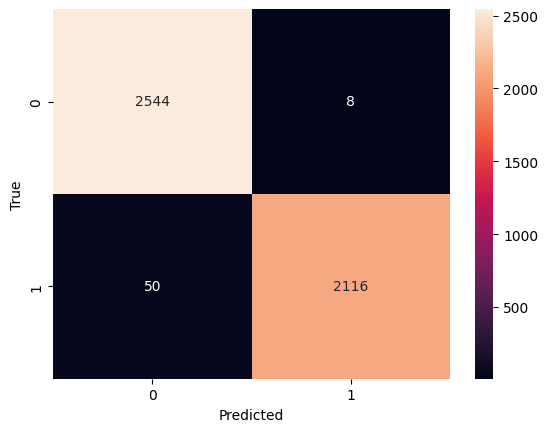

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

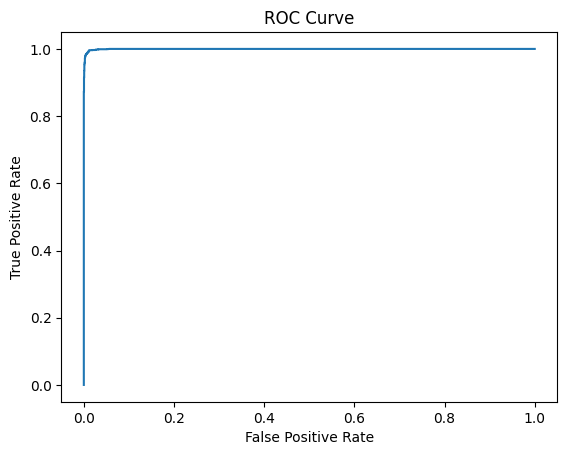

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, RF_classifier.predict_proba(X_new)[:,1:])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Naive Bayes:

In [ ]:
# hyperparaeters:

parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 4:], y_tr)

best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-05}

In [ ]:
NB_classifier = GaussianNB(var_smoothing=1e-05)

sum_nb_f1=0
scores_nb = []
mccs_nb = []
f1s_nb = []
recls_ss = []  # Inicialização da lista de recall
precisions_ss = []  # Inicialização da lista de precision
n=0

for train_index, test_index in s.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    print('Positive samples:', positive)
    print('Negative samples:', negative)

    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,4:], X_tr[test_index,4:], y_tr[train_index], y_tr[test_index]

    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)

    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)

    NB_classifier.fit(X_NB_train_new, y_NB_train)
    scores_nb.append(NB_classifier.score(X_NB_test_new, y_NB_test))
    y_pred = NB_classifier.predict(X_NB_test_new)
    mcc = matthews_corrcoef(y_NB_test, y_pred)
    mccs_nb.append(mcc)
    f1 = f1_score(y_NB_test, y_pred)
    f1s_nb.append(f1)
    recall = recall_score(y_NB_test, y_pred)
    recls_ss.append(recall)  # Armazenamento do recall
    precision = precision_score(y_NB_test, y_pred)
    precisions_ss.append(precision)  # Armazenamento do precision

print("----------------------------------------")
print("Scores: ", np.min(scores_nb), np.max(scores_nb), np.std(scores_nb))
print("F1s: ", np.min(f1s_nb), np.max(f1s_nb), np.std(f1s_nb))
print("MCCs: ", np.min(mccs_nb), np.max(mccs_nb), np.std(mccs_nb))
print("avg cross-validation accuracy:", (sum(scores_nb) / 10))
print("avg cross-validation f1:", (sum(f1s_nb) / 10))
print("avg cross-validation mcc:", (sum(mccs_nb) / 10))
print("avg cross-validation recall:", np.mean(recls_ss))
print("avg cross-validation precision:", np.mean(precisions_ss))


Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
Positive samples: 2166
Negative samples: 2552
----------------------------------------
Scores:  0.625 0.6878980891719745 0.01621904525710882
F1s:  0.5549738219895287 0.6278481012658228 0.019727862010031495
MCCs:  0.24027532859551679 0.3679020784139012 0.03307444396616295
avg cross-validation accuracy: 0.6549453020979523
avg cross-validation f1: 0.5858786397423839
avg cross-validation mcc: 0.3001233145678811


NameError: name 'y_tr_predict' is not defined

Train:

In [ ]:
X_new = X_tr[:,4:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)

print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
recall = recall_score(y_tr, y_tr_predict)
print('Recall on Train set: ', recall)
precision = precision_score(y_tr, y_tr_predict)
print('Precision on Train set: ', precision)

f1 on Train set:  0.6058133605303416
MCC on Train set:  0.33597505175935855
tn, fp, tp, fn 1984 568 1188 978
Specificity on Train set(tn / (tn+fp)):  0.7774294670846394
Sensitivity on Train set(tp / (tp+fn)):  0.5484764542936288
Accuracy on Train set:  0.672318779143705
Recall on Train set:  0.5740740740740741
Precision on Train set:  0.6765375854214123


Teste:

In [ ]:
X_te_new = X_te[:,4:]
X_te_new = min_max_scaler.transform(X_te_new)
y_NB_pred = NB_classifier.predict(X_te_new)

In [ ]:
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_NB_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_NB_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_NB_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)
recall = recall_score(y_te, y_NB_pred)
print('Recall on Test set: ', recall)


*************************************
f1 on Test set:  0.595482546201232
MCC on Test set:  0.3232557300026728
tn, fp, tp, fn 496 142 290 252
Specificity on Test set(tn / (tn+fp)):  0.7774294670846394
Sensitivity on Test set(tp / (tp+fn)):  0.5350553505535055
Accuracy on Test set:  0.6661016949152543
Precision on Test set:  0.6712962962962963
Recall on Test set:  0.5350553505535055


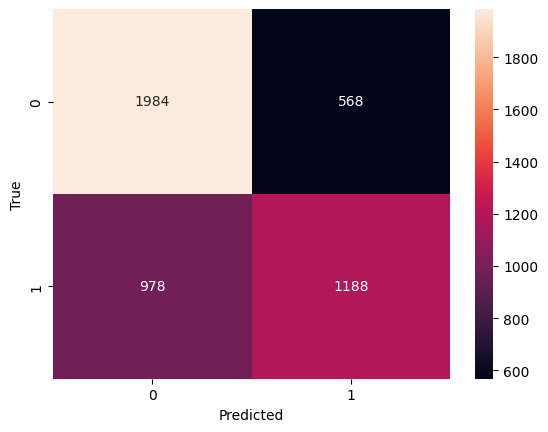

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_tr, y_tr_predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_tr, NB_classifier.predict_proba(X_new)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# Artificial Neural Network:


In [ ]:
pip install keras

In [ ]:
!pip install tensorflow
import tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

In [ ]:
# Define the model creation function
def create_model(optimizer='adam', neurons=32):
    model = keras.Sequential([
        keras.layers.Dense(neurons, activation='relu', input_shape=(X_tr.shape[1],)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the model with KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-67-d87513676611>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [ ]:
# Define the grid search parameters
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [16, 32, 64]
}

# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(accuracy_score), cv=3)
grid_result = grid.fit(X_tr[:,4:], y_tr)

# Deep Learning:



CNN

In [5]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [14]:
# Carregar os dados
import pandas as pd

df = pd.read_csv('/content/article_data_features (1).csv')

In [15]:
df

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,AMP,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,AMP,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,AMP,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,AMP,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,AMP,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,non-AMP,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,non-AMP,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,non-AMP,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,non-AMP,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


label encoder

In [16]:
# # Criando uma instância do LabelEncoder
label_encoder = LabelEncoder()
df['Function'] = label_encoder.fit_transform(df['Function'])

In [17]:
df

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,0,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,0,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,0,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,1,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


In [ ]:
#para experimentar usar apenas uma pequena parte do dataset

from sklearn.model_selection import train_test_split

label_column = 'Function'

subset_size = 0.1 #10% do dataset original
_, df = train_test_split(df, test_size=subset_size, stratify=df[label_column])

In [20]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')
enconde_df.result

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
1,FTEAMP00000002,GLFKGKKKNKKTK,0,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26
3,FTEAMP00000004,RIWVIKRR,0,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
4,FTEAMP00000005,RLARIVVIRVDR,0,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00
5896,NONFTEAMP00002723,HCKFWA,1,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00


In [21]:
hot_encoded = enconde_df.get_hot_encoded()
#print(hot_encoded['One_hot_encoding'][0].shape)
print(hot_encoded['One_hot_encoding'])

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


0       [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1       [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
2       [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3       [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4       [[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
                              ...                        
5893    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5894    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,...
5895    [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...
5896    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5897    [[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...
Name: One_hot_encoding, Length: 5898, dtype: object


In [23]:
tamanho_maximo = df['length'].max()
tamanho_maximo

691.0

In [24]:
enconde_df = Encoding(dataset= df ,  col= 'Sequence')

res = enconde_df.get_pad_and_hot_encoding(seq_len=691)
res

,Identifier,Sequence,Function,length,A,R,N,D,C,E,...,VM,VF,VP,VS,VT,VW,VY,VV,pad_seques,One_hot_encoding
0,FTEAMP00000001,VDKPPYLPRPTPPRRIYNNR,0,20.0,0.000,20.000,10.000,5.000,0.000,0.000,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,VDKPPYLPRPTPPRRIYNNRXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,FTEAMP00000002,GLFKGKKKNKKTK,0,13.0,0.000,0.000,7.692,0.000,0.000,0.000,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,GLFKGKKKNKKTKXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,..."
2,FTEAMP00000003,FLGVVFKLASKVFKAVFGKV,0,20.0,10.000,0.000,0.000,0.000,0.000,0.000,...,0.0,15.79,0.00,0.0,0.00,0.0,0.0,5.26,FLGVVFKLASKVFKAVFGKVXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,FTEAMP00000004,RIWVIKRR,0,8.0,0.000,37.500,0.000,0.000,0.000,0.000,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,RIWVIKRRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,FTEAMP00000005,RLARIVVIRVDR,0,12.0,8.333,33.333,0.000,8.333,0.000,0.000,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,9.09,RLARIVVIRVDRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,NONFTEAMP00002720,FSRLGIKLAETHNKGYRWQHEAVIALA,1,27.0,14.815,7.407,3.704,0.000,0.000,7.407,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,FSRLGIKLAETHNKGYRWQHEAVIALAXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5894,NONFTEAMP00002721,QQCRRPLYCRRRKALAALAKKILWSHPQFEK,1,31.0,12.903,16.129,0.000,0.000,6.452,3.226,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,QQCRRPLYCRRRKALAALAKKILWSHPQFEKXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,..."
5895,NONFTEAMP00002722,CGETCTLGTCYTAGCSCSWPVCTRNGVPI,1,29.0,3.448,3.448,3.448,0.000,20.690,3.448,...,0.0,0.00,3.57,0.0,0.00,0.0,0.0,0.00,CGETCTLGTCYTAGCSCSWPVCTRNGVPIXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,..."
5896,NONFTEAMP00002723,HCKFWA,1,6.0,16.667,0.000,0.000,0.000,16.667,0.000,...,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,HCKFWAXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [28]:
# Usar só as colunas Function, pad_sequence e one_hot encoding


data = res.loc[:, ['Function','pad_seques','One_hot_encoding']]


# Exibir o DataFrame resultante
print(data)

      Function                                         pad_seques  \
0            0  VDKPPYLPRPTPPRRIYNNRXXXXXXXXXXXXXXXXXXXXXXXXXX...   
1            0  GLFKGKKKNKKTKXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
2            0  FLGVVFKLASKVFKAVFGKVXXXXXXXXXXXXXXXXXXXXXXXXXX...   
3            0  RIWVIKRRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
4            0  RLARIVVIRVDRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
...        ...                                                ...   
5893         1  FSRLGIKLAETHNKGYRWQHEAVIALAXXXXXXXXXXXXXXXXXXX...   
5894         1  QQCRRPLYCRRRKALAALAKKILWSHPQFEKXXXXXXXXXXXXXXX...   
5895         1  CGETCTLGTCYTAGCSCSWPVCTRNGVPIXXXXXXXXXXXXXXXXX...   
5896         1  HCKFWAXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
5897         1  CNGTDAKVKLIKQELDKYKNAVTELQLLMQSTXXXXXXXXXXXXXX...   

                                       One_hot_encoding  
0     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...

In [29]:
data.to_csv("/content/article_data_one_hot_encoding.csv", index=False)

In [34]:
from sklearn.model_selection import train_test_split

expanded_arrays = df_subset['One_hot_encoding'].apply(lambda x: np.array(x))
X = np.array(expanded_arrays.tolist())


# X = np.array(res['One_hot_encoding'].apply(lambda x: np.array(x[0])))
y = df_subset['Function']

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
print('train_x', X_train.shape)
print('test_x', x_test.shape)

train_x (3951, 691, 21)
test_x (1947, 691, 21)


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Conv1D,Conv2D, Flatten, MaxPool1D,MaxPool2D, Dropout, Input,GRU
from tensorflow.keras.layers import Embedding, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
checkpoint = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Construção do modelo:

In [37]:
model = Sequential([
    Input(shape=(691, 21)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPool1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.2,callbacks=[checkpoint, early_stopping])

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.5294

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 24s 422ms/step - loss: 0.7007 - accuracy: 0.5294 - val_loss: 0.6785 - val_accuracy: 0.5398
Epoch 2/100
50/50 [==============================] - 14s 281ms/step - loss: 0.6661 - accuracy: 0.6035 - val_loss: 0.6416 - val_accuracy: 0.6030
Epoch 3/100
50/50 [==============================] - 13s 268ms/step - loss: 0.6346 - accuracy: 0.6456 - val_loss: 0.6027 - val_accuracy: 0.6865
Epoch 4/100
50/50 [==============================] - 12s 236ms/step - loss: 0.6076 - accuracy: 0.6810 - val_loss: 0.5906 - val_accuracy: 0.6890
Epoch 5/100
50/50 [==============================] - 12s 229ms/step - loss: 0.5731 - accuracy: 0.7016 - val_loss: 0.5693 - val_accuracy: 0.6953
Epoch 6/100
50/50 [==============================] - 13s 265ms/step - loss: 0.5334 - accuracy: 0.7348 - val_loss: 0.5688 - val_accuracy: 0.6928
Epoch 7/100
50/50 [==============================] - 11s 215ms/step - loss: 0.4830 - accuracy: 0.7696 - val_loss: 0.5984 - val_accuracy: 0.6827
Epoc

In [38]:
print('===================================')
print("Mean Training Accuracy:", np.mean(history.history['accuracy']))
print("Mean Validation Accuracy:", np.mean(history.history['val_accuracy']))
print("Mean Training Loss:", np.mean(history.history['loss']))
print("Mean Validation Loss:", np.mean(history.history['val_loss']))

print('===================================')

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Mean Training Accuracy: 0.8714216145185324
Mean Validation Accuracy: 0.6685792070168716
Mean Training Loss: 0.26154877718251485
Mean Validation Loss: 1.0488862853783827
Test Loss: 0.5747
Test Accuracy: 0.6929


In [39]:
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convertendo previsões para classes binárias

print(y_pred_classes[:10])  # Exibindo as primeiras 10 previsões

61/61 [==============================] - 2s 26ms/step
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]]


Configurar o Tuner:

Nota- fazer no final

In [ ]:
# Configura o tuner

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='dense_hyperparameter_tuning',
)

In [ ]:
Prepare os dados para serem utilizados com Keras, convertendo-os para tensores.

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
#val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(32)


 Executar o Tuning, metodo search:

In [ ]:
# Preparar os dados para o Keras
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

# Executar a busca de hiperparâmetros
tuner.search(train_dataset, epochs=50, validation_data=val_dataset)

# Recuperar os melhores hiperparâmetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Os melhores hiperparâmetros são:
- Unidades na primeira camada: {best_hps.get('units1')}
- Taxa de dropout na primeira camada: {best_hps.get('dropout1')}
- Unidades na segunda camada: {best_hps.get('units2')}
- Taxa de dropout na segunda camada: {best_hps.get('dropout2')}
- Taxa de aprendizagem: {best_hps.get('learning_rate')}
""")

# Construir o modelo com os melhores hiperparâmetros
best_model = tuner.hypermodel.build(best_hps)

# Treinar o melhor modelo
best_model.fit(train_dataset, epochs=50, validation_data=val_dataset)

# Avaliar o modelo no conjunto de teste
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
loss, accuracy = best_model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')


Trial 80 Complete [00h 01m 09s]
val_accuracy: 0.7093220353126526

Best val_accuracy So Far: 0.7186440825462341
Total elapsed time: 00h 15m 31s

Search: Running Trial #81

Value             |Best Value So Far |Hyperparameter
128               |448               |units1
0.3               |0.1               |dropout1
512               |416               |units2
0.4               |0                 |dropout2
0.0044689         |0.00087192        |learning_rate
50                |17                |tuner/epochs
0                 |6                 |tuner/initial_epoch
0                 |2                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/50
148/148 [==============================] - 2s 9ms/step - loss: 11.9993 - accuracy: 0.5212 - val_loss: 0.6877 - val_accuracy: 0.5551
Epoch 2/50
148/148 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5617 - val_loss: 0.6750 - val_accuracy: 0.5415
Epoch 3/50
148/148 [=======================

KeyboardInterrupt: 

 Avaliar os Melhores Hiperparâmetros

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Os melhores hiperparâmetros são:
- Unidades na primeira camada: {best_hps.get('units1')}
- Taxa de dropout na primeira camada: {best_hps.get('dropout1')}
- Unidades na segunda camada: {best_hps.get('units2')}
- Taxa de dropout na segunda camada: {best_hps.get('dropout2')}
- Taxa de aprendizagem: {best_hps.get('learning_rate')}
""")

# Construir o modelo com os melhores hiperparâmetros
best_model = tuner.hypermodel.build(best_hps)

# Treinar o melhor modelo
best_model.fit(train_dataset, epochs=50, validation_data=val_dataset)


Avaliar o Modelo no Conjunto de Teste


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)
loss, accuracy = best_model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')
